In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [2]:
Dataset4_MN = pd.read_csv("cleaned_departures_development_traffic1.csv")
Dataset4_MN = Dataset4_MN.drop(columns=["Name", "Development_Level", "Traffic"])
Dataset4_MN = Dataset4_MN[~Dataset4_MN["Area"].isin(["High", "Low", "Medium"])]

print(Dataset4_MN)

     Departures  Domestic  International  FlagCarrier_Flights      Area
0          7422         0           7422                 1925  Americas
1         11822      8395           3427                11496      Asia
2          4978      2907           2071                 5891    Africa
3          3742         8           3734                 2249  Americas
4          6535         0           6535                 4085    Europe
..          ...       ...            ...                  ...       ...
217         807         0            807                 1132   Pacific
218         463         8            455                  560      Asia
219       96704     76147          20557               102696    Africa
220       10390      6394           3996                 6648    Africa
221        7577      2896           4681                 3866    Africa

[217 rows x 5 columns]


In [3]:
Training_MN, Testing_MN = train_test_split(Dataset4_MN, test_size=.4)
##  Save the Labels and then remove them from the Training and Testing data
Training_MN_Label = Training_MN["Area"]
Training_MN=Training_MN.drop(["Area"], axis=1)
Testing_MN_Label = Testing_MN["Area"]
Testing_MN=Testing_MN.drop(["Area"], axis=1)
print("Testing MN:", Testing_MN)
print("Testing MN labels:", Testing_MN_Label)

Testing MN:      Departures  Domestic  International  FlagCarrier_Flights
170      583530    493799          89731               609078
178        1002         0           1002                    0
2          4978      2907           2071                 5891
51       364400     88111         276289               318061
19        19880      1949          17931                 8088
..          ...       ...            ...                  ...
221        7577      2896           4681                 3866
202          65         0             65                    0
180        4551      1264           3287                    0
59          781         0            781                  549
66           30         0             30                    0

[87 rows x 4 columns]
Testing MN labels: 170        Asia
178      Africa
2        Africa
51       Europe
19       Europe
         ...   
221      Africa
202     Pacific
180      Africa
59       Africa
66     Americas
Name: Area, Length: 87, dt

     Departures  Domestic  International  FlagCarrier_Flights
111       11360         0          11360                10066
119       15160       169          14991                23440
189        9762      8518           1244                 9033
190        1602         2           1600                 2546
137        1501         0           1501                    0
..          ...       ...            ...                  ...
32          545         0            545                    0
124       11387      6337           5050                 7982
107        3422        68           3354                    0
95        17806      4380          13426                12030
43       147946    122802          25144               144195

[130 rows x 4 columns]
111        Asia
119      Europe
189      Africa
190        Asia
137    Americas
         ...   
32       Africa
124        Asia
107    Americas
95         Asia
43     Americas
Name: Area, Length: 130, dtype: object
MultinomialNB()
M

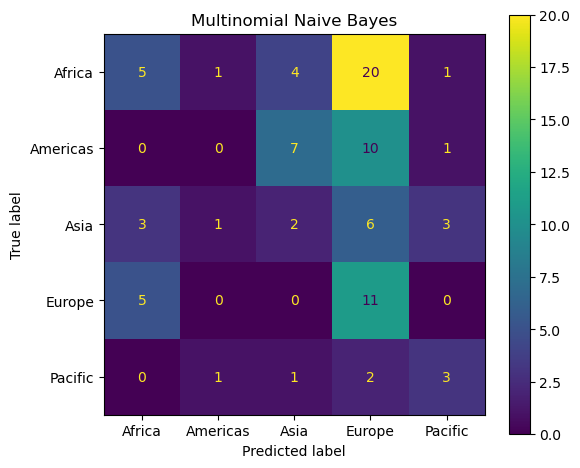

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

## Instantiate the model
MyMN = MultinomialNB()

## Print training data if needed
print(Training_MN)
print(Training_MN_Label)

## Train the model
My_MN_Model = MyMN.fit(Training_MN, Training_MN_Label)
print(My_MN_Model)
print("Model Classes:", My_MN_Model.classes_)

## Make predictions
Predictions_MN = My_MN_Model.predict(Testing_MN)
print("Predictions:", Predictions_MN)

## Show prediction probabilities
print("The Multinomial NB Model Prediction Probabilities are:")
print(My_MN_Model.predict_proba(Testing_MN).round(3))

## Generate confusion matrix using consistent class labels
CM_MN = confusion_matrix(Testing_MN_Label, Predictions_MN, labels=My_MN_Model.classes_)
print("Confusion Matrix:")
print(CM_MN)

## Display pretty confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # single plot
disp = ConfusionMatrixDisplay(confusion_matrix=CM_MN, display_labels=My_MN_Model.classes_)
disp.plot(ax=ax)
ax.set_title("Multinomial Naive Bayes")
plt.tight_layout()
plt.show()


Training Data (Features):
     Departures  Domestic  International  FlagCarrier_Flights
111       11360         0          11360                10066
119       15160       169          14991                23440
189        9762      8518           1244                 9033
190        1602         2           1600                 2546
137        1501         0           1501                    0
..          ...       ...            ...                  ...
32          545         0            545                    0
124       11387      6337           5050                 7982
107        3422        68           3354                    0
95        17806      4380          13426                12030
43       147946    122802          25144               144195

[130 rows x 4 columns]
Training Labels:
111        Asia
119      Europe
189      Africa
190        Asia
137    Americas
         ...   
32       Africa
124        Asia
107    Americas
95         Asia
43     Americas
Name: Area, L

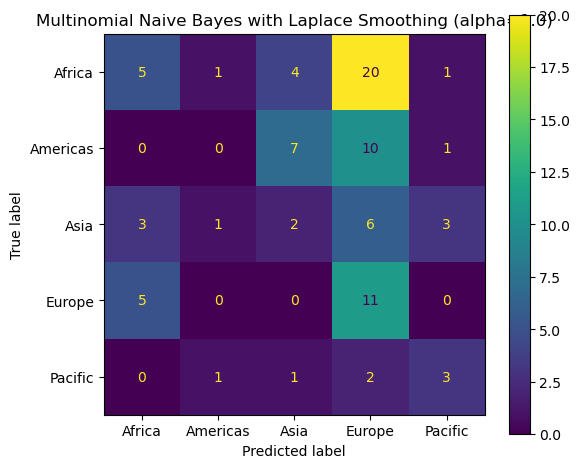

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instanciar el modelo con suavizado (Laplace smoothing)
MyMN = MultinomialNB(alpha = .2)  # Puedes cambiar el valor de alpha si deseas

# Imprimir datos de entrenamiento si es necesario
print("Training Data (Features):")
print(Training_MN)
print("Training Labels:")
print(Training_MN_Label)

# Entrenar el modelo
My_MN_Model = MyMN.fit(Training_MN, Training_MN_Label)
print("Trained Model:", My_MN_Model)
print("Model Classes:", My_MN_Model.classes_)

# Realizar predicciones
Predictions_MN = My_MN_Model.predict(Testing_MN)
print("Predictions:", Predictions_MN)

# Mostrar probabilidades de predicción
print("The Multinomial NB Model Prediction Probabilities are:")
print(My_MN_Model.predict_proba(Testing_MN).round(3))

# Matriz de confusión usando etiquetas consistentes
CM_MN = confusion_matrix(Testing_MN_Label, Predictions_MN, labels=My_MN_Model.classes_)
print("Confusion Matrix:")
print(CM_MN)

# Mostrar matriz de confusión bonita
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=CM_MN, display_labels=My_MN_Model.classes_)
disp.plot(ax=ax)
ax.set_title("Multinomial Naive Bayes with Laplace Smoothing (alpha=1.0)")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, precision_score

# Compute metrics
accuracy = accuracy_score(Testing_G_Label, Predictions_G)
precision = precision_score(Testing_G_Label, Predictions_G, average='weighted')  # or 'macro' if preferred

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")

# Bar plot of accuracy and precision
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision']
values = [accuracy, precision]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


NameError: name 'Testing_G_Label' is not defined